In [4]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

b=
 [[    1   -15   225 -3375]
 [    1   -14   196 -2744]
 [    1   -13   169 -2197]
 [    1   -12   144 -1728]
 [    1   -11   121 -1331]
 [    1   -10   100 -1000]
 [    1    -9    81  -729]
 [    1    -8    64  -512]
 [    1    -7    49  -343]
 [    1    -6    36  -216]
 [    1    -5    25  -125]
 [    1    -4    16   -64]
 [    1    -3     9   -27]
 [    1    -2     4    -8]
 [    1    -1     1    -1]
 [    1     0     0     0]
 [    1     1     1     1]
 [    1     2     4     8]
 [    1     3     9    27]
 [    1     4    16    64]
 [    1     5    25   125]
 [    1     6    36   216]
 [    1     7    49   343]
 [    1     8    64   512]
 [    1     9    81   729]
 [    1    10   100  1000]
 [    1    11   121  1331]
 [    1    12   144  1728]
 [    1    13   169  2197]
 [    1    14   196  2744]
 [    1    15   225  3375]]
m= [-0.04105572 -0.02639296 -0.01274143 -0.00010112  0.01152796  0.02214582
  0.03175245  0.04034786  0.04793205  0.05450501  0.06006674  0.06461725
  0.06815

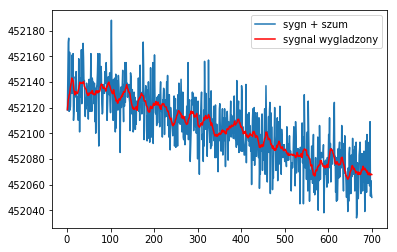

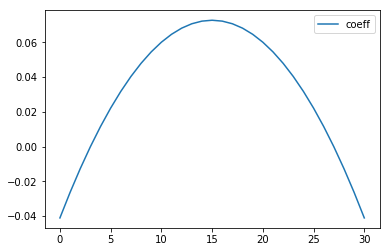

In [15]:
def czytaj_dane(N):
    y = []
    x = np.linspace(1,N,N)
    f =  open('raw_adc.txt')
    y = np.zeros(N)
    ind = 0
    for i in x:
        read_data = f.readline()    
        if not read_data:
            break
        y[ind] = int(read_data)
        ind = ind +1
    f.close
    return (x,y)

def smooth(y, window_size, order, deriv=0, rate=1):
    """
    window_size / order l. calkowite
    window_size musi byc dodatnią liczbą nieparzysta
    window_size > order + 2
    """
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # obliczanie wspolczynnikow
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)#obliczenie ukladu rownan
    print("b=\n",b)#wspolczynniki sa takie same, nie trzeba ich liczyc tylko przesuwac okno
    print("m=",m[::-1])
    # uzupelnianie sygnalu wartosciami z samego sygnalu
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )#wydzielanie pierwszej cz.
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])#wydzielanie trzeciej cz.
    y = np.concatenate((firstvals, y, lastvals))#laczenie
    return m, np.convolve( m[::-1], y, mode='valid')


def smooth_test():
    t, y = czytaj_dane(700)    
    #print(t,y)
    m, ysg = smooth(y, window_size=31, order=3)
    plt.figure()
    plt.plot(t, y, label='sygn + szum')   
    plt.plot(t, ysg, 'r', label='sygnal wygladzony')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(m, label='coeff')       
    plt.legend()
    plt.show()
    
    
sav_gol_test()